In [1]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.impute import KNNImputer
#clp = "Crops and livestock products"
#fnu = "fertilizers by nutrient"


/Users/kalebalemayehu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/kalebalemayehu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
### keep 5 features

clp_har = pd.read_csv('harvest_area.csv')
clp_yield = pd.read_csv('yield.csv')
clp_prod = pd.read_csv('production_q.csv')
fnu = pd.read_csv('fnu.csv')
fbp = pd.read_csv('FBP1.csv')
pest = pd.read_csv('Pesticides_Use.csv')
#clp_har
#ngp = pd.read_csv('natr.gas_price2.csv', sep = ";")

In [3]:
# clp_har = clp_har.loc[(clp_har['Flag'] == "A") | (clp_har['Flag'] == "E")]
# clp_har.drop_duplicates()
# clp_yield = clp_yield.loc[(clp_yield['Flag'] == "A") | (clp_yield['Flag'] == "E")]
# clp_yield.drop_duplicates()
# clp_prod = clp_prod.loc[(clp_prod['Flag'] == "A") | (clp_prod['Flag'] == "E")]
# clp_prod.drop_duplicates()
# clp_yield.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [3]:
clp_yield1 = clp_yield[['Year','Item','Value',]]
clp_yield1= clp_yield1.rename(columns={'Value': 'Yield(hg/ha)'})
clp_har1 = clp_har[['Year','Item','Value',]]
clp_har1= clp_har1.rename(columns={'Value': 'harvest_area (ha)'})
# clp_prod1 = clp_prod[['Year','Item','Value',]]
# clp_prod1= clp_prod1.rename(columns={'Value': 'crop_production(tonnes)'})

clp_har1['Year'].min()


1961

In [4]:
clp_har1['Year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984])

In [5]:
fao_merged = clp_har1.merge(clp_yield1,on=['Year', 'Item'])#.merge(ngp, on='Year'))
fao_merged
# fao_merged.to_csv('fao_final.csv')
# fao_merged['Year'].min()

,Year,Item,harvest_area (ha),Yield(hg/ha)
0,1985,Apples,116800,188887
1,1986,Apples,97100,298878
2,1987,Apples,101600,156787
3,1988,Apples,100000,316443
4,1989,Apples,99400,249808
...,...,...,...,...
2786,2017,Wheat,3202600,76443
2787,2018,Wheat,3036300,66737
2788,2019,Wheat,3118100,73964
2789,2020,Wheat,2835500,78195


Preparation

In [6]:
fnu2 = fnu.copy()
fnu_pivoted = fnu2.pivot(index='Year', columns='Item', values='Value')
fnu2 = pd.DataFrame(fnu_pivoted)
fnu2['Nutrient nitrogen N (total) - tonnes'] = fnu2['Nutrient nitrogen N (total)']
fnu2['Nutrient phosphate P2O5 (total) - tonnes'] = fnu2['Nutrient phosphate P2O5 (total)']
fnu2['Nutrient potash K2O (total) - tonnes'] = fnu2['Nutrient potash K2O (total)']
del fnu2['Nutrient nitrogen N (total)']
del fnu2['Nutrient phosphate P2O5 (total)']
del fnu2['Nutrient potash K2O (total)']
fnu2


Item,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes
Year,,,
1961,877000,849600,1549200
1962,1030961,913332,1611131
1963,1035513,998079,1669877
1964,1123006,1102209,1726820
1965,1287623,1132324,1775855
1966,1321319,1114104,1671770
1967,1344010,1132251,1735168
1968,1443368,1179485,1642087
1969,1571976,1245803,1743664


In [7]:
fpu = pest.copy()
fpu2 = fpu[['Year','Item', 'Value']]
fpu3 = fpu2.drop_duplicates(subset=['Year', 'Item'])
fpu3_pivoted = fpu3.pivot(index='Year', columns='Item', values='Value')
fpu3 = pd.DataFrame(fpu3_pivoted)

fpu3


Item,Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,"Fung & Bact – Triazoles, diazoles",Herbicides – Amides,Herbicides – Bipiridils,Herbicides – Carbamates,Herbicides – Dinitroanilines,...,Rodenticides – Other,Seed Treat Fung – Benzimidazoles,Seed Treat Fung – Botanical products and biologicals,Seed Treat Fung – Dithiocarbamates,Seed Treat Fung – Other,"Seed Treat Fung – Triazoles, diazoles",Seed Treat Insect – Carbamates,Seed Treat Insect – Organo-phosphates,Seed Treat Insect – Other,Seed Treat Insect – Pyrethroids
Year,,,,,,,,,,,,,,,,,,,,,
1990,215.00,1047.00,2828.00,2466.00,2670.00,1719.00,642.00,NaN,924.00,1072.00,...,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,212.00,1007.00,2712.00,1625.00,2283.00,1926.00,1249.00,NaN,1230.00,1500.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,200.00,796.00,2319.00,2042.00,2043.00,1973.00,1238.00,NaN,1489.00,978.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,142.00,188.00,2413.00,2193.00,1768.00,956.00,782.00,161.00,1056.00,423.00,...,48.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,176.00,614.00,2427.00,2078.00,1460.00,943.00,957.00,51.00,1342.00,148.00,...,19.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,184.00,1043.00,2966.00,2514.00,1629.00,1316.00,1114.00,141.00,937.00,1001.00,...,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,173.00,1288.00,3452.00,2631.00,1767.00,1093.00,1178.00,84.00,991.00,1125.00,...,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,188.00,795.00,2989.00,2158.00,2111.00,1156.00,1295.00,104.00,707.00,812.00,...,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,223.00,1035.00,2830.00,2989.00,1788.00,1197.00,1097.00,93.00,541.00,837.00,...,81.00,13.00,NaN,30.00,342.00,83.00,95.00,27.00,67.00,NaN


In [8]:
fbp2 = fbp.copy()
fbp3 = fbp2[['Year','Item', 'Value']]

fbp3 = fbp2.drop_duplicates(subset=['Year', 'Item'])
fbp3_pivoted = fbp3.pivot(index='Year', columns='Item', values='Value')

fbp3 = pd.DataFrame(fbp3_pivoted)





In [11]:
master_data = (fnu2.merge(fao_merged,on='Year').merge(fpu3,on='Year'))#.merge(ngp, on='Year'))
master_data["Yield(hg/ha)"] = master_data["Yield(hg/ha)"].apply(lambda x: x / 10_000)
master_data= master_data.rename(columns={'Yield(hg/ha)': 'Yield(tonnes/ha)'})
master_data

master_data.to_csv("master_data_pest2.csv")

#master_data['Item'].value_counts()


In [10]:
prod = "Apples"
prod_df = master_data[master_data['Item'] == prod]
prod_df

,Year,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,harvest_area (ha),Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,...,Rodenticides – Other,Seed Treat Fung – Benzimidazoles,Seed Treat Fung – Botanical products and biologicals,Seed Treat Fung – Dithiocarbamates,Seed Treat Fung – Other,"Seed Treat Fung – Triazoles, diazoles",Seed Treat Insect – Carbamates,Seed Treat Insect – Organo-phosphates,Seed Treat Insect – Other,Seed Treat Insect – Pyrethroids
0,1990,1787300,609000,954400,Apples,84400,26.3272,215.00,1047.00,2828.00,...,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,1991,1720000,519000,729658,Apples,39200,19.9184,212.00,1007.00,2712.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,1992,1680000,490000,673851,Apples,39200,35.1480,200.00,796.00,2319.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,1993,1612215,415000,645000,Apples,39200,22.5102,142.00,188.00,2413.00,...,48.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,1994,1787436,451000,668000,Apples,36400,24.1621,176.00,614.00,2427.00,...,19.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,1995,1770000,401946,649000,Apples,36100,15.8809,184.00,1043.00,2966.00,...,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,1996,1758008,415136,645781,Apples,36400,24.1236,173.00,1288.00,3452.00,...,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,1997,1788388,409536,658895,Apples,35800,21.3575,188.00,795.00,2989.00,...,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,1998,1903017,406678,628733,Apples,35800,27.2961,223.00,1035.00,2830.00,...,81.00,13.00,NaN,30.00,342.00,83.00,95.00,27.00,67.00,NaN
447,1999,2014010,420000,599150,Apples,35800,28.9413,228.00,1318.00,2381.00,...,140.00,13.00,NaN,33.00,282.00,100.00,82.00,0.00,57.00,NaN


/var/folders/l4/pbw5dk1139gdk7nt6gdt2yp40000gn/T/ipykernel_36695/2105752105.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(prod_df.corr(method='pearson'), annot=False)


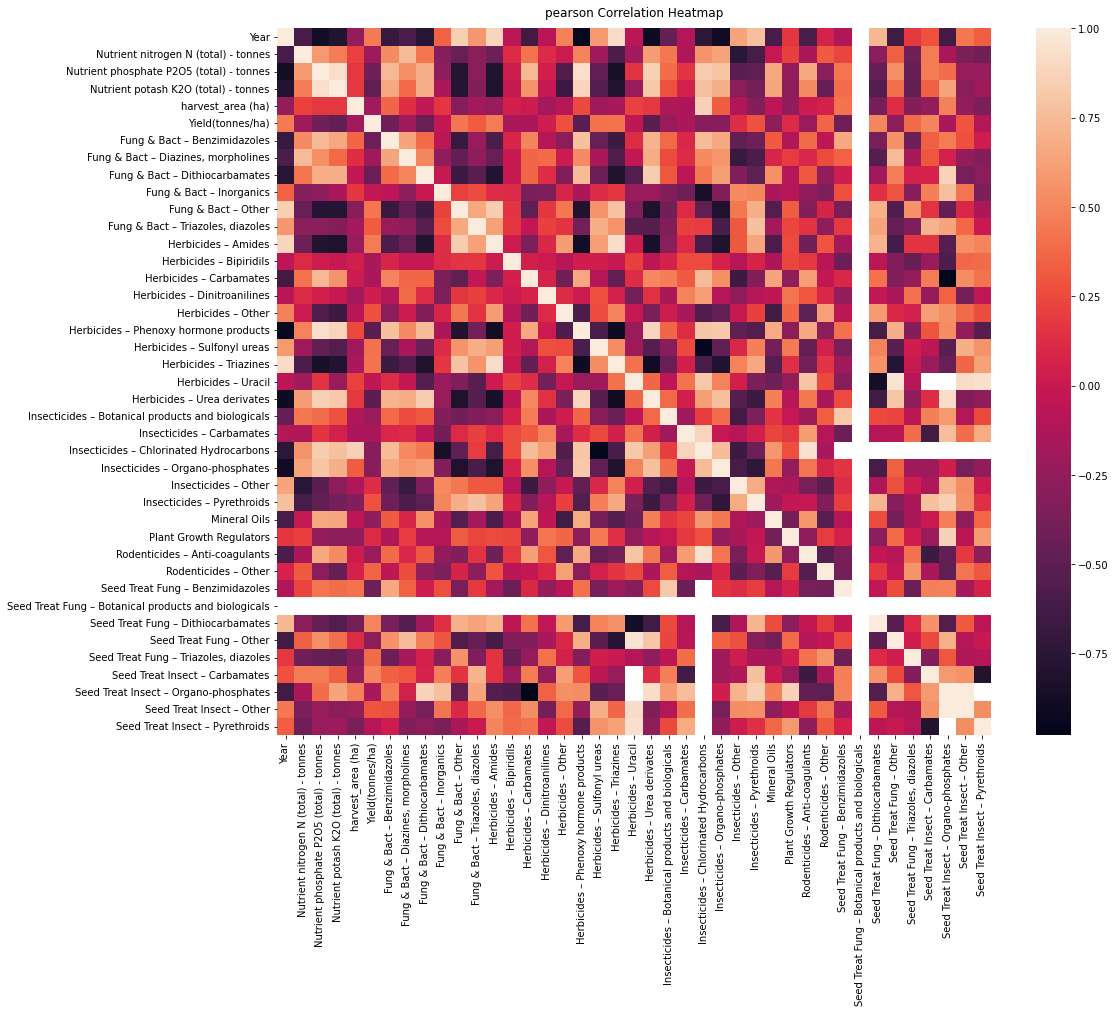

In [13]:
plt.figure(figsize=(16, 13))
#mask = np.triu(np.ones_like(apples2.corr(), dtype=bool))
heatmap = sns.heatmap(prod_df.corr(method='pearson'), annot=False)
heatmap.set_title('pearson Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

/var/folders/l4/pbw5dk1139gdk7nt6gdt2yp40000gn/T/ipykernel_36695/3451677283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = prod_df.corr()


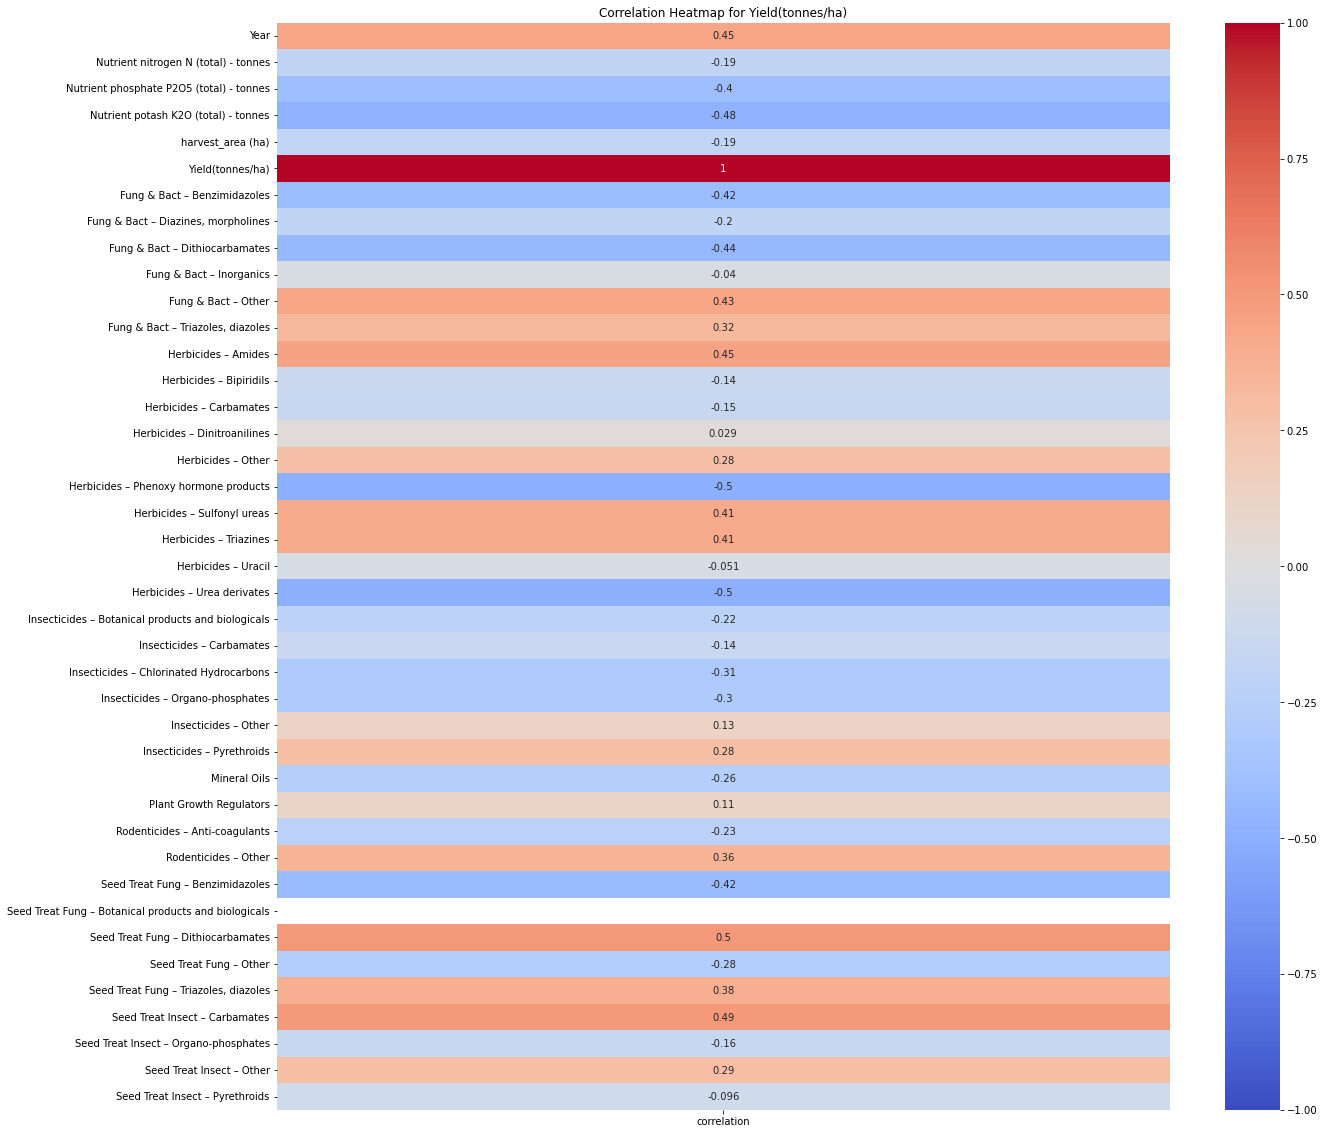

In [16]:
corr_matrix = prod_df.corr()
corr_with_selected = corr_matrix['Yield(tonnes/ha)']
corr_df = pd.DataFrame({'correlation': corr_with_selected.values}, index=corr_with_selected.index)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Yield(tonnes/ha)')
plt.show()
